# 📊 Project 1: Superstore Sales Analysis
Welcome to my first internship project! In this project, I’ll analyze Superstore sales data to uncover trends and business insights.


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Superstore.csv", encoding='latin-1')

In [13]:
# Display basic info
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# Check missing values
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [15]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check data types
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [16]:
# Add new columns for Month and Year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

# Check the new columns
print(df[['Order Date', 'Order Month', 'Order Year']].head())

  Order Date  Order Month  Order Year
0 2016-11-08           11        2016
1 2016-11-08           11        2016
2 2016-06-12            6        2016
3 2015-10-11           10        2015
4 2015-10-11           10        2015


## 📈 Monthly Sales & Profit
We’ll look at how sales and profit vary by month.

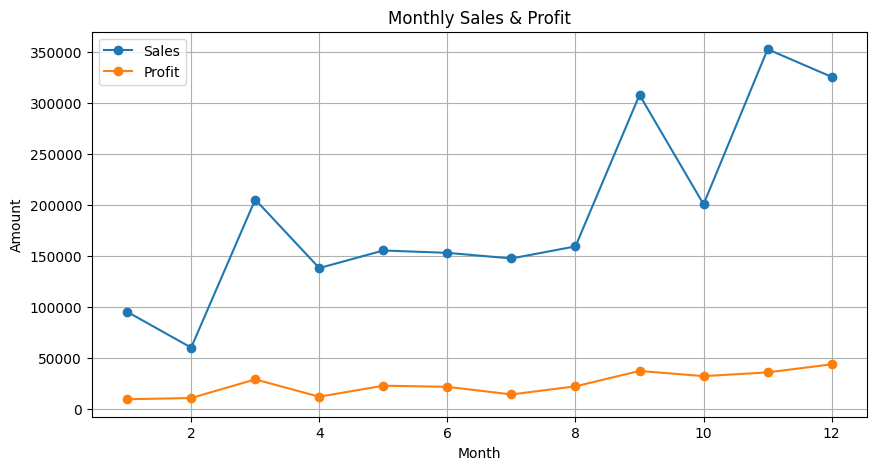

In [17]:
import matplotlib.pyplot as plt
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Monthly Sales & Profit"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_profit = df.groupby('Order Month')['Profit'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(label='Sales', marker='o')
monthly_profit.plot(label='Profit', marker='o')
plt.title(plot_title)
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid()

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()


## 📍 Top 10 Cities by Sales
Let’s identify the top-performing cities.

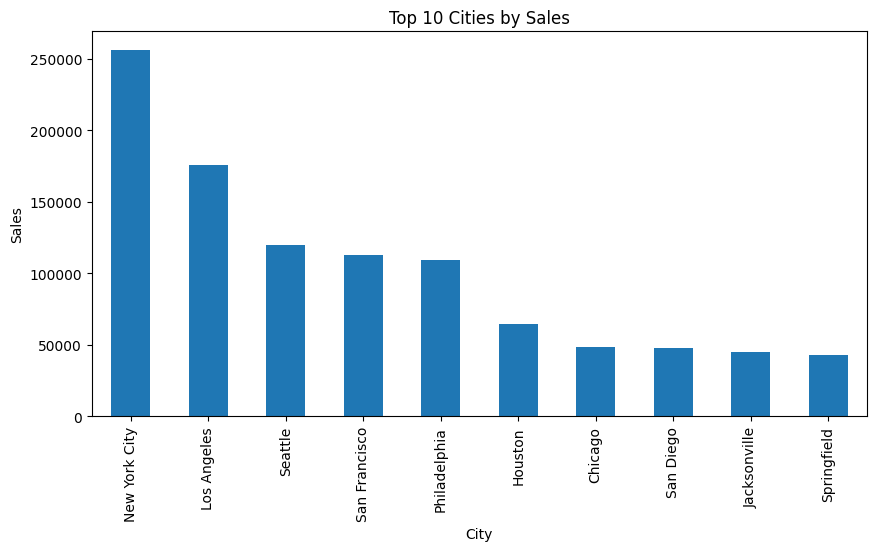

In [18]:
os.makedirs("images", exist_ok=True)
plot_title = "Top 10 Cities by Sales"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5), title=plot_title)
plt.ylabel("Sales")

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()


## 🧾 Category vs Profit
Which product categories and sub-categories are the most profitable?

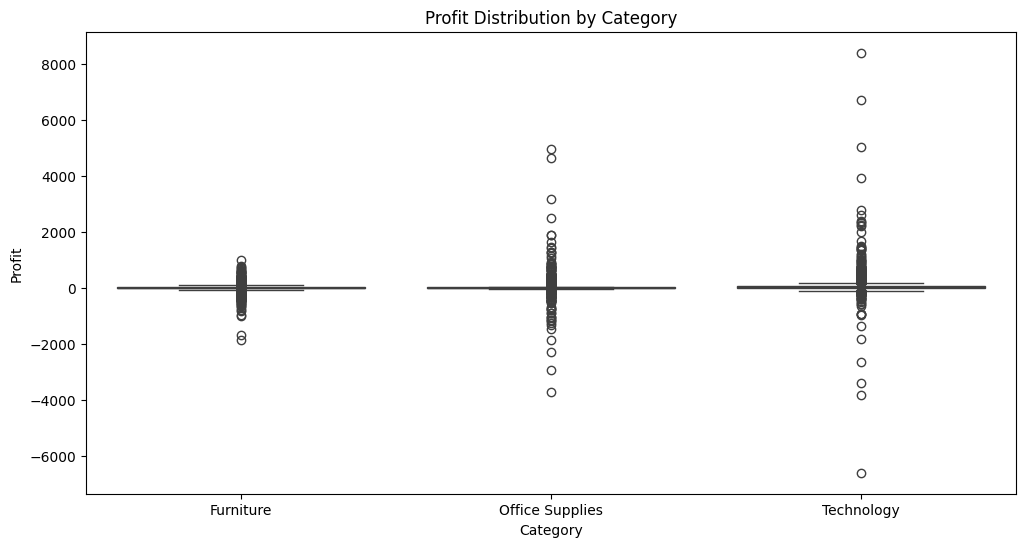

In [19]:
import seaborn as sns

os.makedirs("images", exist_ok=True)
plot_title = "Profit Distribution by Category"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Profit')
plt.title(plot_title)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

## 💸 Do Discounts Hurt Profit?
Let’s visualize the relationship between discount and profit.

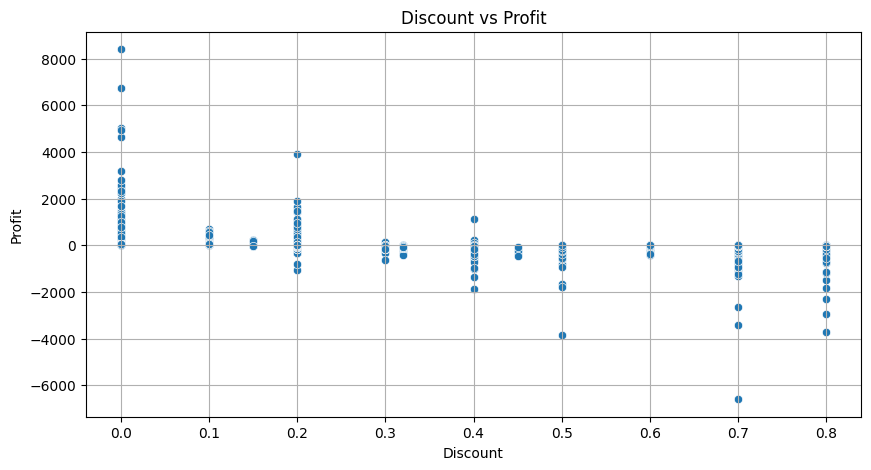

In [20]:
os.makedirs("images", exist_ok=True)
plot_title = "Discount vs Profit"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title(plot_title)
plt.grid()

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

## ✅ Insights
- 🏙️ New York and Los Angeles are the top-performing cities
- 💼 Technology is the most profitable category
- 📉 High discounts reduce profit significantly
- 📆 December brings the most sales annually